# CHURN MODELLING PREDICTION USING ANN MODEL

#                                                              SUBMITTED BY NIKHIL GARG(18CSU141)

In [1]:
import pandas as pd
import numpy as np

In [2]:
#read csv file
df = pd.read_csv('Churn_Modelling.csv')


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#correlation of all columns
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [5]:
#drop irrelevant columns
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [6]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Feature Selection

In [7]:
X=df.drop(labels=['Exited'],axis=1)
y=df['Exited']

In [8]:
X['Geography'] = X['Geography'].astype('category')
X['Gender'] = X['Gender'].astype('category')

In [9]:
#Encoding
cat_columns = X.select_dtypes(['category']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

In [10]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [11]:
# IN Gender,Female represents as 0 and Male represents as 1
# In Geography,France=0,Spain=2,Germany=1

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']] = sc.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']])

C:\Users\Nikhil Garg\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nikhil Garg\Anaconda3\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\Nikhil Garg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [16]:
# tranform to an array
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)

# ANN MODEL

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# Initialising the ANN
classifier = Sequential()

In [20]:
from tensorflow.keras.layers import Dropout
classifier.add(Dense(units = 10, activation = 'tanh'))
classifier.add(Dropout(0.5))
# Adding the first hidden layer
classifier.add(Dense(units = 6, activation = 'tanh'))
classifier.add(Dropout(0.5))
# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [21]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [23]:
#fitting the model on train data
%%time
classifier.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 124us/sample - loss: 0.5946 - val_loss: 0.4968
Epoch 2/100
8000/8000 [==============================] - 0s 38us/sample - loss: 0.4925 - val_loss: 0.4571
Epoch 3/100
8000/8000 [==============================] - 0s 39us/sample - loss: 0.4697 - val_loss: 0.4454
Epoch 4/100
8000/8000 [==============================] - 0s 40us/sample - loss: 0.4608 - val_loss: 0.4406
Epoch 5/100
8000/8000 [==============================] - 0s 39us/sample - loss: 0.4582 - val_loss: 0.4387
Epoch 6/100
8000/8000 [==============================] - 0s 39us/sample - loss: 0.4526 - val_loss: 0.4354
Epoch 7/100
8000/8000 [==============================] - 0s 39us/sample - loss: 0.4527 - val_loss: 0.4330
Epoch 8/100
8000/8000 [==============================] - 0s 39us/sample - loss: 0.4495 - val_loss: 0.4308
Epoch 9/100
8000/8000 [==============================] - 0s 41us/sample - loss: 0.4467 - val_loss: 0.42

<AxesSubplot:>

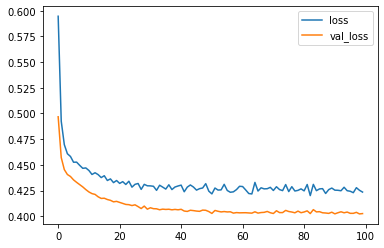

In [24]:
model_loss = pd.DataFrame(classifier.history.history)
model_loss.plot()

In [25]:
predictions = classifier.predict_classes(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1588
           1       0.79      0.26      0.39       412

    accuracy                           0.83      2000
   macro avg       0.82      0.62      0.65      2000
weighted avg       0.83      0.83      0.80      2000



The Accuracy of our model is 83 Percent

# Prediction for the Given Data

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France;
Credit Score: 499;
Gender: Male; 
Age: 39 years old;
Tenure: 3 years;
Balance: $50000;
Number of Products: 2;
Does this customer have a credit card ? Yes;
Is this customer an Active Member: Yes;
Estimated Salary: $60000;


In [32]:
predict_1=classifier.predict_classes([[0,499,1,39,3,50000,2,1,1,60000]])

In [34]:
predict_1

array([[1]])

Yes,Customer with the following informations left the bank

# THANK YOU!